In [1]:
import psycopg2

import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 200
import polars as pl

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]

from pprint import pprint
from collections import OrderedDict

from clickhouse_driver import Client

client = Client('localhost', database="thesisproxyheap")

In [2]:
%%time 

exp_data_sql = """
SELECT
	ex.*
FROM
	experiment ex
"""
exp_df = client.query_dataframe(exp_data_sql)
print(len(exp_df.exp_id.unique().tolist()))
print("\n".join(exp_df.exp_id.unique().tolist()))
print()
exp_df

10
thesis_group_controlling_proxy_heap_size_8clients_withattacker_10000MBheap_50proxyconns_coap_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_controlling_proxy_heap_size_8clients_withattacker_10000MBheap_50proxyconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_controlling_proxy_heap_size_8clients_withattacker_1000MBheap_50proxyconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_controlling_proxy_heap_size_8clients_withattacker_4000MBheap_50proxyconns_coap_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_controlling_proxy_heap_size_8clients_withattacker_4000MBheap_50proxyconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_controlling_proxy_heap_size_8clients_withattacker_5500MBheap_50proxyconns_coap_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_controlling_proxy_heap_size_8clients_withattacker_5500MBheap_50proxyconns_dtls_https__140sec_proxy__30sec_attacker__120sec_c

,exp_id,attacker_rate,server_connections,max_keep_alive_requests,num_clients,num_trials,origin_server_duration,attacker_duration,receiver_duration,proxy_duration,...,topology_name,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker
0,thesis_group_controlling_proxy_heap_size_8clients_withattacker_10000MBheap_50proxyconns_coap_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,False,True,True
1,thesis_group_controlling_proxy_heap_size_8clients_withattacker_10000MBheap_50proxyconns_coap_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,False,True,True
2,thesis_group_controlling_proxy_heap_size_8clients_withattacker_10000MBheap_50proxyconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,True,True,True
3,thesis_group_controlling_proxy_heap_size_8clients_withattacker_10000MBheap_50proxyconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,True,True,True
4,thesis_group_controlling_proxy_heap_size_8clients_withattacker_1000MBheap_50proxyconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,True,True,True
5,thesis_group_controlling_proxy_heap_size_8clients_withattacker_1000MBheap_50proxyconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,True,True,True
6,thesis_group_controlling_proxy_heap_size_8clients_withattacker_4000MBheap_50proxyconns_coap_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,False,True,True
7,thesis_group_controlling_proxy_heap_size_8clients_withattacker_4000MBheap_50proxyconns_coap_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,False,True,True
8,thesis_group_controlling_proxy_heap_size_8clients_withattacker_4000MBheap_50proxyconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,True,True,True
9,thesis_group_controlling_proxy_heap_size_8clients_withattacker_4000MBheap_50proxyconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client,100mbps,256,0,8,5,140,30,140,140,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,True,True,True


In [5]:
%%time 

fetch_metadata_sql = """
SELECT
	n.node_name,
	dn.dnid,
	dn.node_id,
  dn.exp_id
FROM 
	deployed_node dn
	JOIN node n ON n.node_id = dn.node_id
"""

metadata_df = client.query_dataframe(fetch_metadata_sql)

dnid_map_node_name = dict()
dnid_map_exp_id = dict()
node_id_map_node_name = dict()

for record in metadata_df.to_dict(orient="records"):
  dnid = record["dnid"]
  node_id = record["node_id"]
  node_name = record["node_name"]
  exp_id = record["exp_id"]
  
  assert dnid not in dnid_map_node_name
  dnid_map_node_name[dnid] = node_name
  dnid_map_exp_id[dnid] = exp_id
  
  if node_id in node_id_map_node_name:
    assert node_id_map_node_name[node_id] == node_name
  else:
    node_id_map_node_name[node_id] = node_name
  
client_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("client"))
attacker_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("attacker"))

client_node_ids = set(node_id for node_id, node_name in node_id_map_node_name.items() if node_name.startswith("client"))

print(f"{client_dnids=}")
print(f"{attacker_dnids=}")
print(f"{client_node_ids=}")

client_dnids={2, 3, 4, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28, 29, 30, 31, 32, 33, 38, 39, 40, 41, 42, 43, 44, 45, 50, 51, 52, 53, 54, 55, 56, 57, 62, 63, 64, 65, 66, 67, 68, 69, 74, 75, 76, 77, 78, 79, 80, 81, 86, 87, 88, 89, 90, 91, 92, 93, 98, 99, 100, 101, 102, 103, 104, 105, 110, 111, 112, 113, 114, 115, 116, 117, 122, 123, 124, 125, 126, 127, 128, 129, 134, 135, 136, 137, 138, 139, 140, 141, 146, 147, 148, 149, 150, 151, 152, 153, 158, 159, 160, 161, 162, 163, 164, 165, 170, 171, 172, 173, 174, 175, 176, 177, 182, 183, 184, 185, 186, 187, 188, 189}
attacker_dnids={1, 97, 121, 37, 133, 73, 169, 13, 109, 49, 145, 85, 157, 181, 25, 61}
client_node_ids={2, 3, 4, 5, 6, 7, 8, 9}
CPU times: user 9.04 ms, sys: 2.24 ms, total: 11.3 ms
Wall time: 39.5 ms


In [6]:
%%time

communication_pattern_rates_sql = f"""
WITH all_patterns AS (
  SELECT
    dn.exp_id AS exp_id,
    e.trial AS trial,
    e.observe_timestamp AS observe_timestamp,
    floor(e.observe_timestamp) AS timestamp_bin,
    e.message_marker AS message_marker,
    concat(node_src.node_name, '->', node_dst.node_name) AS communication_pattern,
    m.size_bytes AS size_bytes
  FROM
    event e
    JOIN deployed_node dn ON dn.dnid = e.observer_id
    JOIN message m ON m.message_id = e.message_id
    JOIN node node_src ON node_src.node_id = m.src_id
    JOIN node node_dst ON node_dst.node_id = m.dst_id

), pattern_aggregations AS (
  SELECT
    exp_id,
    trial,
    communication_pattern,
    timestamp_bin,
    SUM(size_bytes) AS sum_bytes,
    COUNT(DISTINCT message_marker) AS num_messages
  FROM
    all_patterns
  GROUP BY
    exp_id, trial, communication_pattern, timestamp_bin
)

SELECT
  *,
  (1e-6 * sum_bytes) AS megabytes_per_second,
  (8 * 1e-6 * sum_bytes) AS megabits_per_second
FROM
  pattern_aggregations
ORDER BY
  timestamp_bin
"""

binned_messages_df = client.query_dataframe(communication_pattern_rates_sql)
binned_messages_df

CPU times: user 266 ms, sys: 61.3 ms, total: 328 ms
Wall time: 3 s


,exp_id,trial,communication_pattern,timestamp_bin,sum_bytes,num_messages,megabytes_per_second,megabits_per_second
0,thesis_group_num_clients_dtls_https_6clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,3,proxy->client2,0.0,195,1,0.000195,0.001560
1,thesis_group_num_clients_coap_https_5clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,3,client1->proxy,0.0,2550,12,0.002550,0.020400
2,thesis_group_num_clients_dtls_https_4clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client1->proxy,0.0,3752,13,0.003752,0.030016
3,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,1,proxy->originserver,0.0,2993,13,0.002993,0.023944
4,thesis_group_num_clients_coap_https_3clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,2,proxy->originserver,0.0,2763,12,0.002763,0.022104
...,...,...,...,...,...,...,...,...
106282,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,2,client8->proxy,126.0,1029,7,0.001029,0.008232
106283,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,1,proxy->originserver,126.0,1165,5,0.001165,0.009320
106284,thesis_group_num_clients_coap_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,1,originserver->proxy,126.0,6874,14,0.006874,0.054992
106285,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,proxy->client8,126.0,1365,7,0.001365,0.010920


In [7]:
%%time

filtered_binned_messages_df = binned_messages_df[
  binned_messages_df["communication_pattern"].isin(
    [f"client{n}->proxy" for n in range(1, 9)]
  )
]

_df = (
  filtered_binned_messages_df
  .groupby(by=["exp_id", "communication_pattern"])
  .agg(
    avg_num_messages=("num_messages", "sum"),
    avg_message_size=("sum_bytes", "sum"),
    avg_megabits_per_second=("megabits_per_second", "mean"),
    median_megabits_per_second=("megabits_per_second", "median"),
  )
  .reset_index()
  .sort_values(by=["exp_id", "communication_pattern"])
)

_df["avg_message_size"] /= _df["avg_num_messages"]
_df["avg_num_messages"] /= 5
_df["avg_messages_per_second"] = _df["avg_num_messages"]
_df["avg_messages_per_second"] /= 20

print(_df.exp_id)

_df

0     thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client
1     thesis_group_num_clients_coap_https_2clients_noattacker__140sec_proxy__30sec_attacker__120sec_client
2     thesis_group_num_clients_coap_https_2clients_noattacker__140sec_proxy__30sec_attacker__120sec_client
3     thesis_group_num_clients_coap_https_3clients_noattacker__140sec_proxy__30sec_attacker__120sec_client
4     thesis_group_num_clients_coap_https_3clients_noattacker__140sec_proxy__30sec_attacker__120sec_client
                                                      ...                                                 
67    thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client
68    thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client
69    thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client
70    thesis_group_num_clients_dtls_h

,exp_id,communication_pattern,avg_num_messages,avg_message_size,avg_megabits_per_second,median_megabits_per_second,avg_messages_per_second
0,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,client1->proxy,2245.4,212.392625,0.031794,0.032264,112.27
1,thesis_group_num_clients_coap_https_2clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,client1->proxy,2254.8,212.483679,0.031941,0.032264,112.74
2,thesis_group_num_clients_coap_https_2clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,client2->proxy,2262.0,212.433775,0.032035,0.032264,113.10
3,thesis_group_num_clients_coap_https_3clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,client1->proxy,2263.8,212.341903,0.032047,0.032264,113.19
4,thesis_group_num_clients_coap_https_3clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,client2->proxy,2269.6,212.490835,0.032151,0.032264,113.48
...,...,...,...,...,...,...,...
67,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,client4->proxy,2272.6,285.250814,0.043002,0.043512,113.63
68,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,client5->proxy,2268.6,286.660936,0.043211,0.043512,113.43
69,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,client6->proxy,2274.2,286.019699,0.043292,0.043512,113.71
70,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,client7->proxy,2249.4,289.290744,0.043310,0.043512,112.47


In [8]:
%%time

_df = (
  filtered_binned_messages_df
  .groupby(by=["exp_id", "trial", "communication_pattern"])
  .agg(
    num_messages=("num_messages", "sum"),
    avg_megabits_per_second=("megabits_per_second", "mean"),
    median_megabits_per_second=("megabits_per_second", "median"),
  )
)

_df

CPU times: user 50.3 ms, sys: 372 µs, total: 50.7 ms
Wall time: 48 ms


num_messages  \
exp_id                                                                                               trial communication_pattern                 
thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client 1     client1->proxy                 2238   
                                                                                                     2     client1->proxy                 2254   
                                                                                                     3     client1->proxy                 2245   
                                                                                                     4     client1->proxy                 2244   
                                                                                                     5     client1->proxy                 2246   
...                                                                                                                                        ...   
thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client 5     client4->proxy                 2272   
                                                                                                           client5->proxy                 2266   
                                                                                                           client6->proxy                 2276   
                                                                                                           client7->proxy                 2260   
                                                                                                           client8->proxy                 2275   

                                                                                                                                  avg_megabits_per_second  \
exp_id                                                                                               trial communication_pattern                            
thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client 1     client1->proxy                        0.031768   
                                                                                                     2     client1->proxy                        0.031804   
                                                                                                     3     client1->proxy                        0.031782   
                                                                                                     4     client1->proxy                        0.031811   
                                                                                                     5     client1->proxy                        0.031804   
...                                                                                                                                                   ...   
thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client 5     client4->proxy                        0.043257   
                                                                                                           client5->proxy                        0.043404   
                                                                                                           client6->proxy                        0.043404   
                                                                                                           client7->proxy                        0.043433   
                                                                                                           client8->proxy                        0.043433   

                                                                                                                                  median_megabits_per_second  
exp_id                        

In [9]:
%%time

client_messages_sql = f"""
WITH client_sends AS (
  SELECT
    dn.exp_id AS exp_id,
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_retransmitted AS coap_retransmitted
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
    JOIN deployed_node dn ON dn.dnid = e.observer_id
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.src_id IN ({','.join(map(str, client_node_ids))}) -- clients are senders (node ID)
), 

client_recvs AS (
  SELECT
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_code AS response_code
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.dst_id IN ({','.join(map(str, client_node_ids))}) -- clients are receivers (node ID)
)

SELECT
  client_sends.exp_id AS exp_id,
  client_sends.trial AS trial,
  client_sends.observer_id AS observer_id,
  client_sends.message_marker AS message_marker,
  groupArray(client_recvs.response_code)[1] AS response_code,
  MIN(client_sends.observe_timestamp) AS send_time_sec,
  MIN(client_recvs.observe_timestamp) AS recv_time_sec,
  MIN(client_sends.observe_timestamp) AS first_send_time_sec,
  MAX(client_sends.observe_timestamp) AS last_send_time_sec,
  MIN(client_recvs.observe_timestamp) AS first_recv_time_sec,
  MAX(client_recvs.observe_timestamp) AS last_recv_time_sec,
  1e3 * (MIN(client_recvs.observe_timestamp) - MIN(client_sends.observe_timestamp)) AS rtt_ms_first_transmission,
  1e3 * (MIN(client_recvs.observe_timestamp) - MAX(client_sends.observe_timestamp)) AS rtt_ms_last_transmission,
  COUNT(client_sends.observe_timestamp) AS num_send_observations,
  COUNT(client_recvs.observe_timestamp) AS num_recv_observations,
  SUM(CASE WHEN client_sends.coap_retransmitted = true THEN 1 ELSE 0 END) AS num_retransmissions
FROM client_sends
  LEFT JOIN client_recvs USING (trial, observer_id, message_marker)
GROUP BY 
  exp_id, trial, observer_id, message_marker
ORDER BY
  exp_id, trial, observer_id, message_marker
"""

message_rtt_df = client.query_dataframe(client_messages_sql)
message_rtt_df.observer_id.replace(dnid_map_node_name, inplace=True)

message_rtt_df["successful_message"] = False
message_rtt_df.loc[(message_rtt_df["response_code"] == "content"), "successful_message"] = True

print(message_rtt_df["response_code"].unique())

message_rtt_df = message_rtt_df.merge(exp_df, on="exp_id", how="left")

# Due to left join, we need to eliminate lines that
# have negative RTT, so we NaN them.
message_rtt_df.loc[
  (message_rtt_df["rtt_ms_first_transmission"] < 0)
  | (message_rtt_df["rtt_ms_last_transmission"] < 0)
  ,
  ["rtt_ms_first_transmission", "rtt_ms_last_transmission"]
] = np.nan

message_rtt_df

['content' '' 'bad_gateway']
CPU times: user 4.1 s, sys: 1.32 s, total: 5.42 s
Wall time: 8.51 s


,exp_id,trial,observer_id,message_marker,response_code,send_time_sec,recv_time_sec,first_send_time_sec,last_send_time_sec,first_recv_time_sec,...,topology_name,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker
0,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,1,client1,1,content,0.000000,0.340071,0.000000,0.000000,0.340071,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,False,True,False
1,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,1,client1,2,content,0.355290,0.415595,0.355290,0.355290,0.415595,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,False,True,False
2,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,1,client1,3,content,0.418002,0.477663,0.418002,0.418002,0.477663,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,False,True,False
3,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,1,client1,4,content,0.479755,0.536881,0.479755,0.479755,0.536881,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,False,True,False
4,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,1,client1,5,content,0.539208,0.595318,0.539208,0.539208,0.595318,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797570,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client8,17773,content,125.717236,125.769829,125.717236,125.717236,125.769829,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,True,True,False
797571,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client8,17774,content,125.770620,125.823153,125.770620,125.770620,125.823153,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,True,True,False
797572,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client8,17775,content,125.823910,125.876400,125.823910,125.823910,125.876400,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,True,True,False
797573,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client8,17776,content,125.877252,125.929843,125.877252,125.877252,125.929843,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,True,True,True,False


In [10]:
%%time

(
  message_rtt_df.groupby(by=["exp_id", "trial", "observer_id"])
  .agg(
    avg_rtt_ms_first_transmission=("rtt_ms_first_transmission", "mean"),
    avg_rtt_ms_last_transmission=("rtt_ms_last_transmission", "mean"),
    num_unique_messages=("message_marker", "nunique"),
    num_messages=("message_marker", "count"),
    num_successful_messages=("successful_message", "sum"),
    num_send_messages=("num_send_observations", "sum"),
    num_recv_messages=("num_recv_observations", "sum"),
    max_num_retransmissions=("num_retransmissions", "max"),
    total_num_retransmissions=("num_retransmissions", "sum"),
  )
)

CPU times: user 570 ms, sys: 6.38 ms, total: 576 ms
Wall time: 569 ms


avg_rtt_ms_first_transmission  \
exp_id                                                                                               trial observer_id                                  
thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client 1     client1                          53.514646   
                                                                                                     2     client1                          53.478773   
                                                                                                     3     client1                          53.504021   
                                                                                                     4     client1                          53.486532   
                                                                                                     5     client1                          53.490108   
...                                                                                                                                               ...   
thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client 5     client4                          52.611271   
                                                                                                           client5                          52.565499   
                                                                                                           client6                          52.572990   
                                                                                                           client7                          52.551917   
                                                                                                           client8                          52.524888   

                                                                                                                        avg_rtt_ms_last_transmission  \
exp_id                                                                                               trial observer_id                                 
thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client 1     client1                         53.514646   
                                                                                                     2     client1                         53.478773   
                                                                                                     3     client1                         53.504021   
                                                                                                     4     client1                         53.486532   
                                                                                                     5     client1                         53.490108   
...                                                                                                                                              ...   
thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client 5     client4                         52.611271   
                                                                                                           client5                         52.565499   
                                                                                                           client6                         52.572990   
                                                                                                           client7                         52.551917   
                                                                                                           client8                         52.524888   

                                                                                                                        num_unique_messages  \
exp_id    

In [11]:
%%time

metric_usage_sql = f"""
SELECT
	dn.exp_id,
	nm.trial,
	nm.observer_id,
	nm.metric_type,
	AVG(nm.metric_value) AS avg_value,
	MIN(nm.metric_value) AS min_value,
	MAX(nm.metric_value) AS max_value
FROM
	node_metric nm
	JOIN deployed_node dn ON dn.dnid = nm.observer_id
GROUP BY
	dn.exp_id, nm.trial, nm.observer_id, nm.metric_type
ORDER BY
	dn.exp_id, nm.trial, nm.metric_type, nm.observer_id
"""

metric_df = client.query_dataframe(metric_usage_sql)

metric_df.observer_id.replace(dnid_map_node_name, inplace=True)

metric_df

CPU times: user 70.9 ms, sys: 979 µs, total: 71.9 ms
Wall time: 133 ms


,exp_id,trial,observer_id,metric_type,avg_value,min_value,max_value
0,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,1,originserver,cpu_utilization,0.935714,0.3,11.5
1,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,1,proxy,cpu_utilization,1.565000,0.5,21.2
2,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,1,originserver,memory_utilization,261.662810,250.0,263.0
3,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,1,proxy,memory_utilization,366.561983,251.0,404.0
4,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,2,originserver,cpu_utilization,0.927143,0.3,10.0
...,...,...,...,...,...,...,...
315,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,4,proxy,memory_utilization,462.127273,245.0,495.0
316,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,originserver,cpu_utilization,1.485714,0.4,9.2
317,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,proxy,cpu_utilization,3.462143,0.5,26.5
318,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,originserver,memory_utilization,260.966997,247.0,262.0


In [12]:
%%time

client_rps_df = (
  message_rtt_df
  .groupby(by=["exp_id", "trial", "observer_id"])
  .aggregate(
    num_messages=("successful_message", "count"),
    num_successful_messages=("successful_message", "sum"),
    mean_rps=("successful_message", "sum"),
    num_retransmissions=("num_retransmissions", "sum"),
    stddev_rtt_ms=("rtt_ms_first_transmission", "std"),
    min_rtt_ms=("rtt_ms_first_transmission", "min"),
    median_rtt_ms=("rtt_ms_first_transmission", "median"),
    max_rtt_ms=("rtt_ms_first_transmission", "max"),
    rtt_ms_p0=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.00)),
    rtt_ms_p25=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.25)),
    rtt_ms_p50=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.50)),
    rtt_ms_p75=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.75)),
    rtt_ms_p99=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.99)),
    rtt_ms_p100=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=1.00)),
    first_active_time=("first_send_time_sec", "min"),
    last_active_time=("last_recv_time_sec", "max"),
  )
  .reset_index()
)
assert client_rps_df["min_rtt_ms"].eq(client_rps_df["rtt_ms_p0"]).all()
assert client_rps_df["median_rtt_ms"].eq(client_rps_df["rtt_ms_p50"]).all()
assert client_rps_df["max_rtt_ms"].eq(client_rps_df["rtt_ms_p100"]).all()

client_rps_df["num_failed_messages"] = client_rps_df["num_messages"] - client_rps_df["num_successful_messages"]
client_rps_df["average_rps"] = client_rps_df["num_successful_messages"] / (client_rps_df["last_active_time"] - client_rps_df["first_active_time"])

client_rps_df = client_rps_df.merge(exp_df, on="exp_id")
bool_col_replacement = {
  "run_proxy_with_dtls": {True: "dtls", False: "coap"},
  "run_proxy_with_https": {True: "https", False: "http"},
  "reuse_connections": {True: "reuse-connections", False: "no-connection-reuse"},
  "run_attacker": {True: "attacker", False: "no-attacker"},
}
client_rps_df.replace(bool_col_replacement, inplace=True)

client_rps_df["mean_rps"] /= client_rps_df["client_duration"]

client_rps_df[["exp_id", "trial", "observer_id", "mean_rps"]]

client_rps_df

CPU times: user 3.99 s, sys: 44.7 ms, total: 4.03 s
Wall time: 4.03 s


,exp_id,trial,observer_id,num_messages,num_successful_messages,mean_rps,num_retransmissions,stddev_rtt_ms,min_rtt_ms,median_rtt_ms,...,topology_name,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker
0,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,1,client1,2193,2192,18.266667,0,6.225256,52.523136,53.233027,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,reuse-connections,coap,https,no-attacker
1,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,2,client1,2195,2194,18.283333,0,5.871298,52.347183,53.217888,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,reuse-connections,coap,https,no-attacker
2,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,3,client1,2194,2193,18.275000,0,6.452826,52.574158,53.226948,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,reuse-connections,coap,https,no-attacker
3,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,4,client1,2196,2195,18.291667,0,6.344324,52.577019,53.225040,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,reuse-connections,coap,https,no-attacker
4,thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client1,2195,2194,18.283333,0,6.272037,52.393913,53.220510,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,reuse-connections,coap,https,no-attacker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client4,2211,2210,18.416667,0,1.313610,51.450014,52.492976,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,reuse-connections,dtls,https,no-attacker
356,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client5,2219,2218,18.483333,0,0.544515,51.644802,52.495003,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,reuse-connections,dtls,https,no-attacker
357,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client6,2219,2218,18.483333,0,0.817425,51.687956,52.504897,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,reuse-connections,dtls,https,no-attacker
358,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client7,2220,2220,18.500000,0,0.749001,51.648855,52.508831,...,thesis_cloud_proxy_and_internet_attacker,50,5,2,5,1,reuse-connections,dtls,https,no-attacker


In [13]:
(
  client_rps_df
  .groupby(by=["exp_id", "num_clients", "run_proxy_with_dtls"])
  .agg(
    total_successful_messages=("num_successful_messages", "sum"),
  )
)

,,,total_successful_messages
exp_id,num_clients,run_proxy_with_dtls,
thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,1,coap,10968
thesis_group_num_clients_coap_https_2clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,2,coap,22068
thesis_group_num_clients_coap_https_3clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,3,coap,33242
thesis_group_num_clients_coap_https_4clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,4,coap,44483
thesis_group_num_clients_coap_https_5clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,coap,55695
thesis_group_num_clients_coap_https_6clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,6,coap,66748
thesis_group_num_clients_coap_https_7clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,7,coap,78023
thesis_group_num_clients_coap_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,8,coap,89277
thesis_group_num_clients_dtls_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,1,dtls,10834


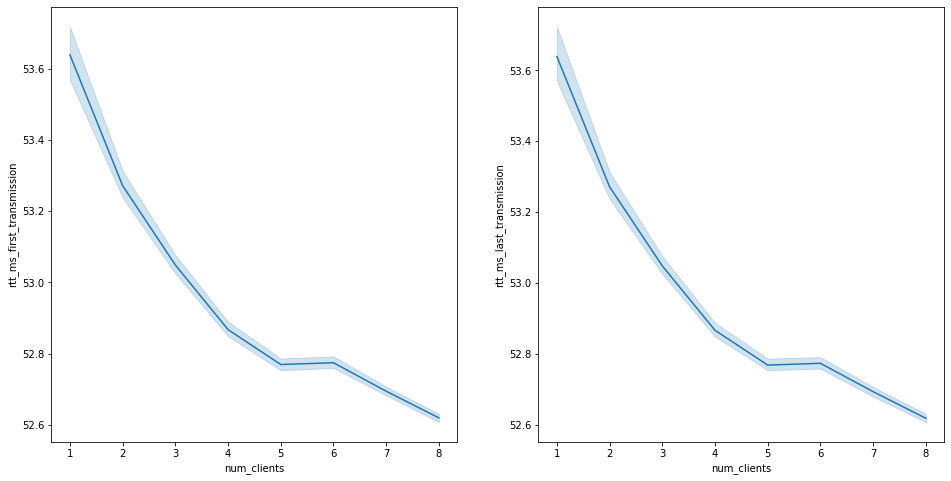

In [12]:
df = message_rtt_df
param_comparison_scope = "num_clients"

_, ax = plt.subplots(1, 2)

g = sns.lineplot(
  data=df,
  x=param_comparison_scope,
  y="rtt_ms_first_transmission",
  ax=ax[0],
)

g = sns.lineplot(
  data=df,
  x=param_comparison_scope,
  y="rtt_ms_last_transmission",
  ax=ax[1],
)

plt.show()

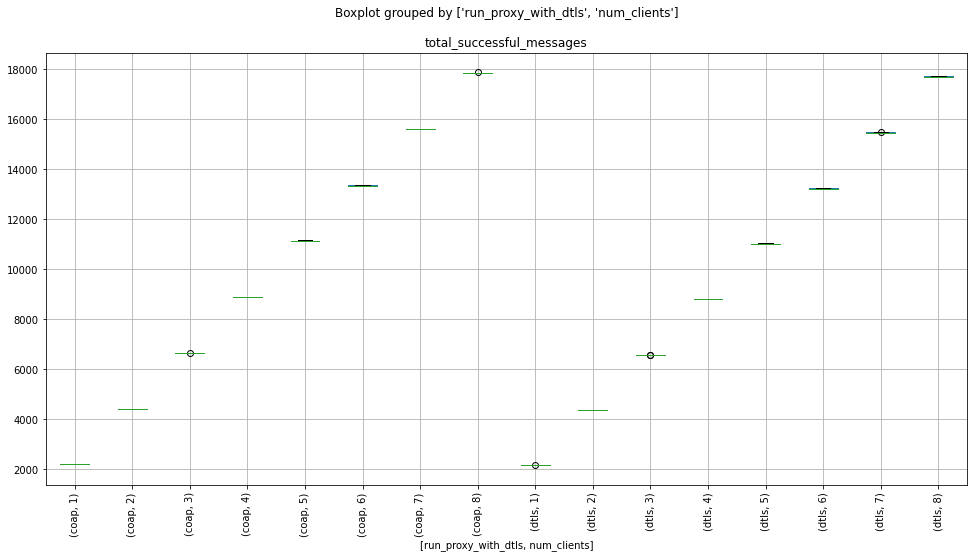

total_successful_messages
exp_id                                                                                               run_proxy_with_dtls num_clients trial                           
thesis_group_num_clients_coap_https_1clients_noattacker__140sec_proxy__30sec_attacker__120sec_client coap                1           1                           2192
                                                                                                                                     2                           2194
                                                                                                                                     3                           2193
                                                                                                                                     4                           2195
                                                                                                                                     5                           2194
...                                                                                                                                                               ...
thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client dtls                8           1                          17706
                                                                                                                                     2                          17691
                                                                                                                                     3                          17682
                                                                                                                                     4                          17715
                                                                                                                                     5                          17724

[80 rows x 1 columns]

In [14]:
df = (
  client_rps_df
  .groupby(by=["exp_id", "run_proxy_with_dtls", "num_clients", "trial"])
  .agg(
    total_successful_messages=("num_successful_messages", "sum")
  )
)
param_comparison_scope = ["run_proxy_with_dtls", "num_clients"]

plot_args = {
  "rot": 90,
  "by": param_comparison_scope,
}

df.boxplot("total_successful_messages", **plot_args)

plt.show()

df

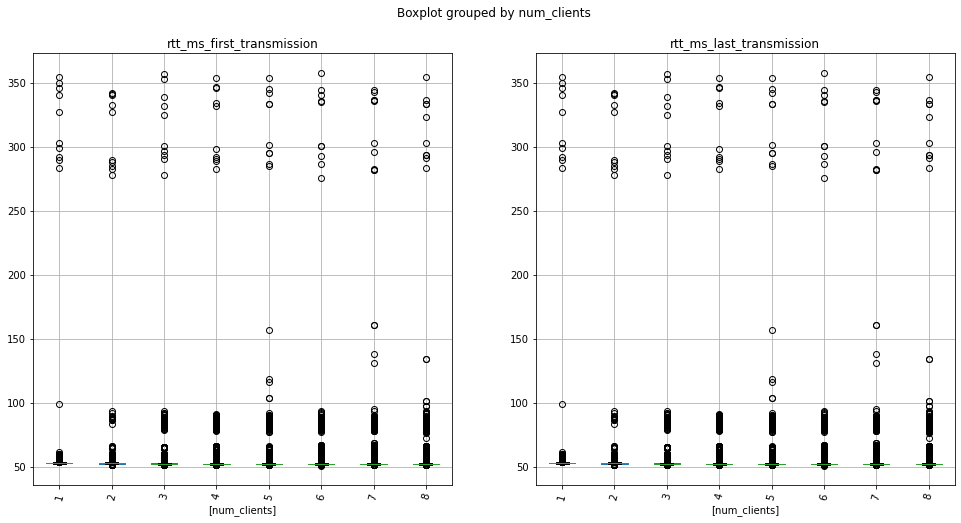

,average_rps
num_clients,
1,53.638783
2,53.271470
3,53.048720
4,52.867313
5,52.769333
6,52.774312
7,52.694416
8,52.619514


In [13]:
df = message_rtt_df
param_comparison_scope = ["num_clients"]

plot_args = {
  "rot": 75,
  "by": param_comparison_scope,
}

plots = ["rtt_ms_first_transmission", "rtt_ms_last_transmission"]
_, axes = plt.subplots(1, len(plots))
for i, p in enumerate(plots):
  df.boxplot(p, ax=axes[i], **plot_args)

plt.show()

(
  message_rtt_df
  .groupby(by=param_comparison_scope)
  .agg(
    average_rps=("rtt_ms_first_transmission", "mean")
  )
)

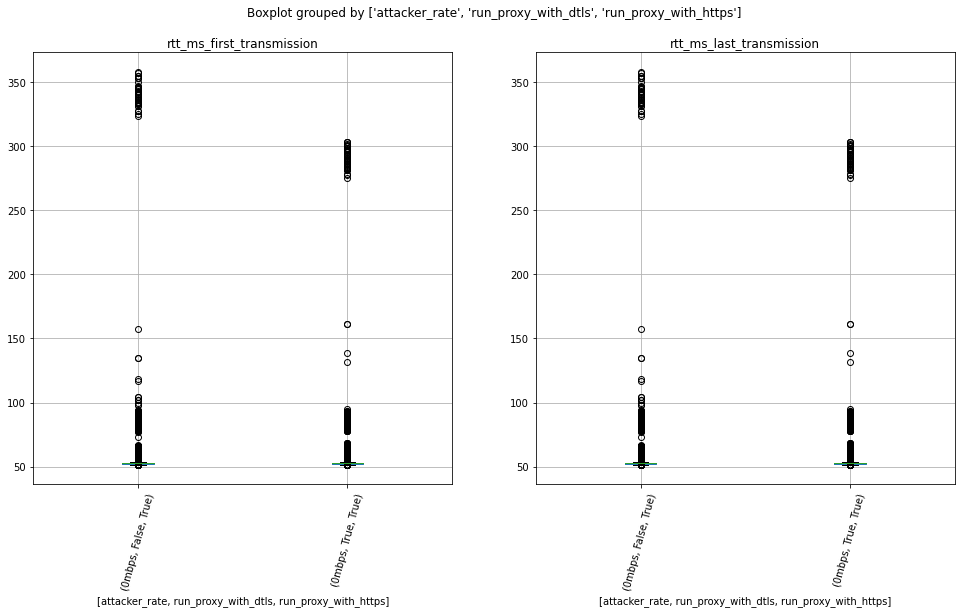

average_rps
attacker_rate run_proxy_with_dtls run_proxy_with_https             
0mbps         False               True                    52.750830
              True                True                    52.881434

In [14]:
df = message_rtt_df
param_comparison_scope = ["attacker_rate", "run_proxy_with_dtls", "run_proxy_with_https"]

plot_args = {
  "rot": 75,
  "by": param_comparison_scope,
}

plots = ["rtt_ms_first_transmission", "rtt_ms_last_transmission"]
_, axes = plt.subplots(1, len(plots))
for i, p in enumerate(plots):
  df.boxplot(p, ax=axes[i], **plot_args)

plt.show()

(
  message_rtt_df
  .groupby(by=["attacker_rate", "run_proxy_with_dtls", "run_proxy_with_https"])
  .agg(
    average_rps=("rtt_ms_first_transmission", "mean")
  )
)

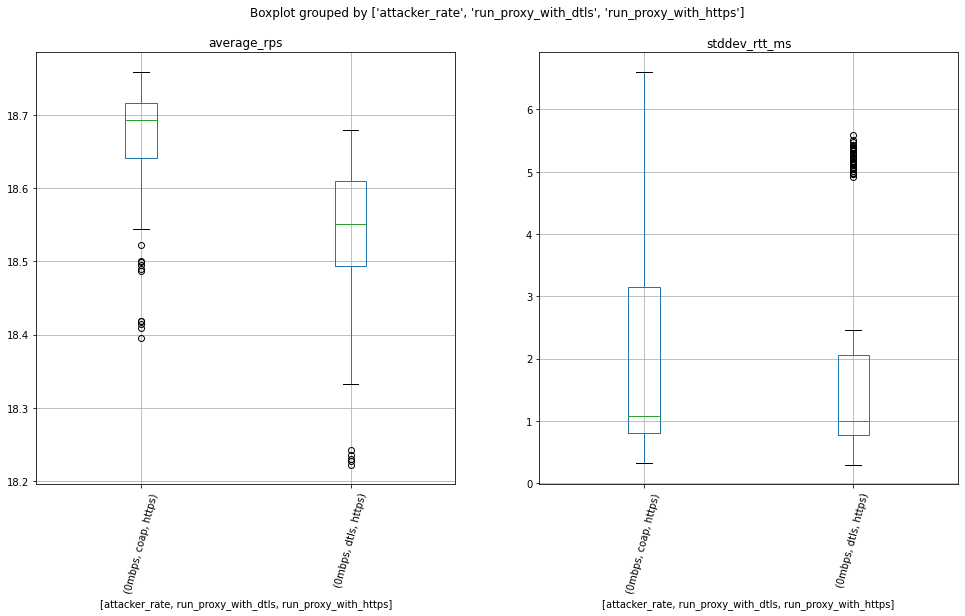

In [15]:
df = client_rps_df
param_comparison_scope = ["attacker_rate", "run_proxy_with_dtls", "run_proxy_with_https"]

plot_args = {
  "rot": 75,
  "by": param_comparison_scope,
}

plots = ["average_rps", "stddev_rtt_ms"]
_, axes = plt.subplots(1, len(plots))
for i, p in enumerate(plots):
  df.boxplot(p, ax=axes[i], **plot_args)

plt.show()

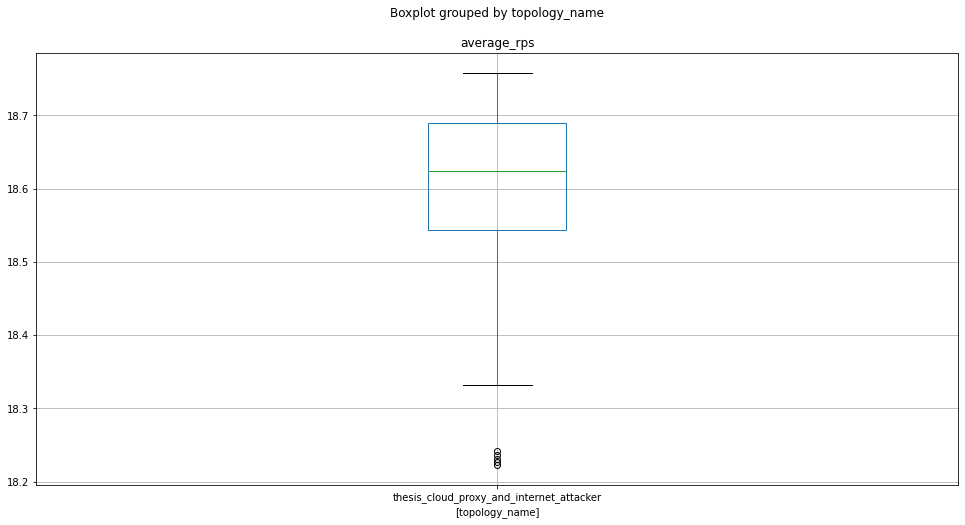

In [16]:
param_comparison_scope = ["topology_name"]

ax = None
ax = df.boxplot("average_rps", by=param_comparison_scope, ax=ax)
plt.show()

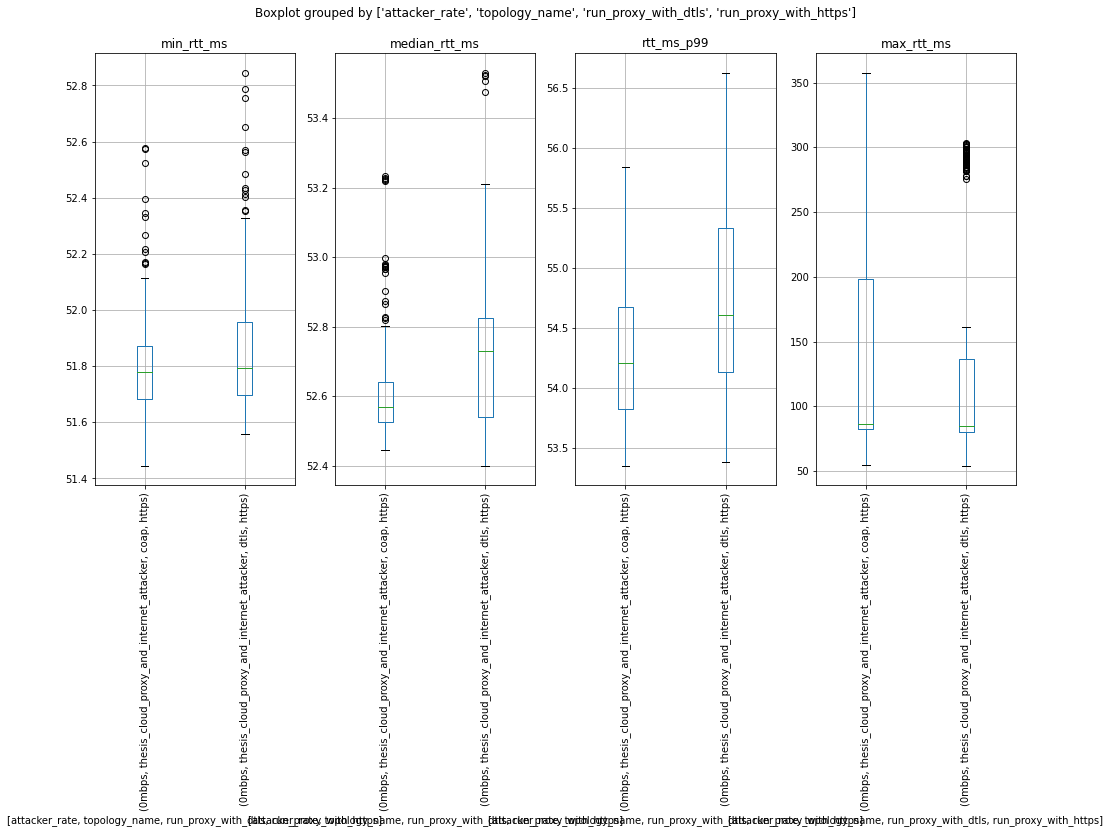

In [17]:
param_comparison_scope = ["attacker_rate", "topology_name", "run_proxy_with_dtls", "run_proxy_with_https"]

plot_args = {
  "by": param_comparison_scope,
  "rot": 90,
}

_, axes = plt.subplots(1, 4)

df.boxplot("min_rtt_ms", ax=axes[0], **plot_args)
df.boxplot("median_rtt_ms", ax=axes[1], **plot_args)
df.boxplot("rtt_ms_p99", ax=axes[2], **plot_args)
df.boxplot("max_rtt_ms", ax=axes[3], **plot_args)

plt.show()